# Librerías

In [1]:
#Tratamiento de datos
import numpy as np
#Motor de inferencia
import skfuzzy
from skfuzzy import control as ctrl
#Gráficos
import matplotlib.pyplot as plt
#Advertencias
import warnings

In [2]:
warnings.filterwarnings('ignore')

# 1. Declarar los universos de discurso

In [3]:
#Temperatura
temperatura = ctrl.Antecedent(np.arange(0, 61, 1), 'temperatura')
#Humedad
humedad = ctrl.Antecedent(np.arange(10, 101, 1), 'humedad')
#Potencia
potencia = ctrl.Consequent(np.arange(0, 81, 1), 'potencia')

# 2. Fuzzificar las variables

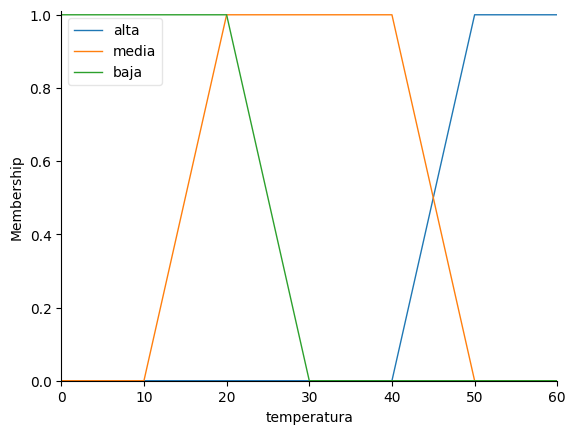

In [5]:
#Temperatura
temperatura['alta'] = skfuzzy.trapmf(temperatura.universe, [40, 50, 60, 60])
temperatura['media'] = skfuzzy.trapmf(temperatura.universe, [10, 20, 40, 50])
temperatura['baja'] = skfuzzy.trapmf(temperatura.universe, [0, 0, 20, 30])

temperatura.view()
plt.show()

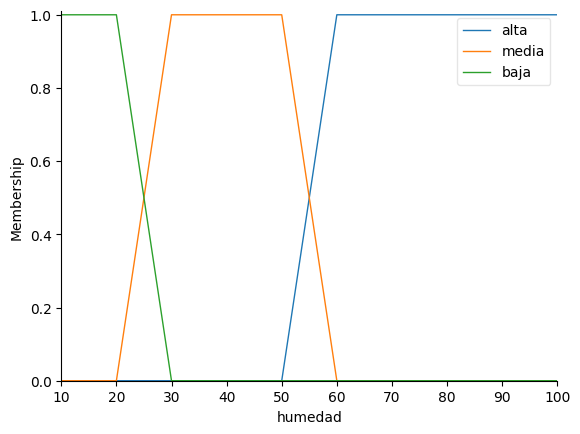

In [6]:
#Humedad
humedad['alta'] = skfuzzy.trapmf(humedad.universe, [50, 60, 100, 100])
humedad['media'] = skfuzzy.trapmf(humedad.universe, [20, 30, 50, 60])
humedad['baja'] = skfuzzy.trapmf(humedad.universe, [10, 10, 20, 30])

humedad.view()
plt.show()

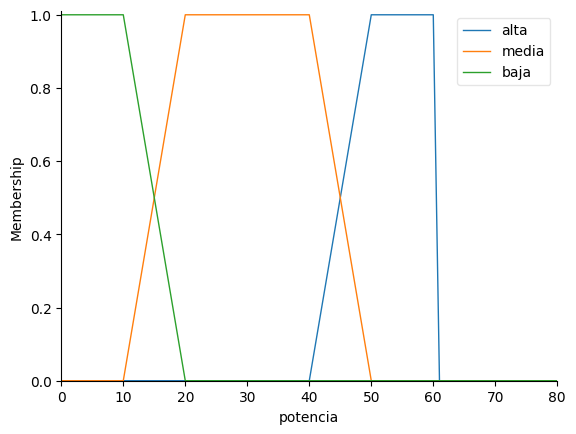

In [7]:
#Potencia
potencia['alta'] = skfuzzy.trapmf(potencia.universe, [40, 50, 60, 60])
potencia['media'] = skfuzzy.trapmf(potencia.universe, [10, 20, 40, 50])
potencia['baja'] = skfuzzy.trapmf(potencia.universe, [0, 0, 10, 20])

potencia.view()
plt.show()

# Crear la base de conocimiento

In [8]:
regla1 = ctrl.Rule(temperatura['alta'] & humedad['alta'], potencia['alta'])
regla2 = ctrl.Rule(temperatura['alta'] & humedad['media'], potencia['media'])
regla3 = ctrl.Rule(temperatura['alta'] & humedad['baja'], potencia['media'])
regla4 = ctrl.Rule(temperatura['media'] & humedad['alta'], potencia['alta'])
regla5 = ctrl.Rule(temperatura['media'] & humedad['media'], potencia['baja'])
regla6 = ctrl.Rule(temperatura['media'] & humedad['baja'], potencia['media'])
regla7 = ctrl.Rule(temperatura['baja'] & humedad['alta'], potencia['media'])
regla8 = ctrl.Rule(temperatura['baja'] & humedad['media'], potencia['baja'])
regla9 = ctrl.Rule(temperatura['baja'] & humedad['baja'], potencia['baja'])

# 4. Activar motor de inferencia

In [9]:
controlPotencia = ctrl.ControlSystem([regla1, regla2, regla3,
                                     regla4, regla5, regla6,
                                     regla7, regla8, regla9])

# 5. Uso del SIB

In [26]:
# Temperatura = 30
# Humedad = 70
potenciaMotor = ctrl.ControlSystemSimulation(controlPotencia)
potenciaMotor.input['temperatura'] = 30
potenciaMotor.input['humedad'] = 70
potenciaMotor.compute()

In [27]:
potenciaMotor.output['potencia']

52.483870967741936

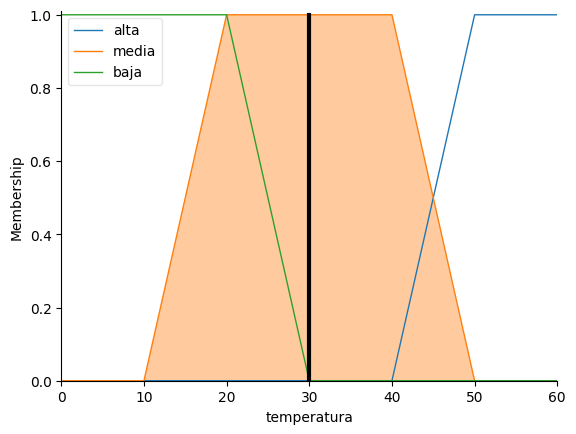

In [28]:
#Reglas activadas
temperatura.view(sim = potenciaMotor)

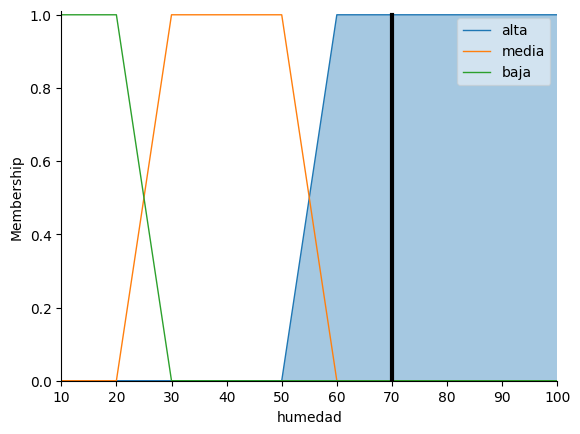

In [29]:
humedad.view(sim = potenciaMotor)

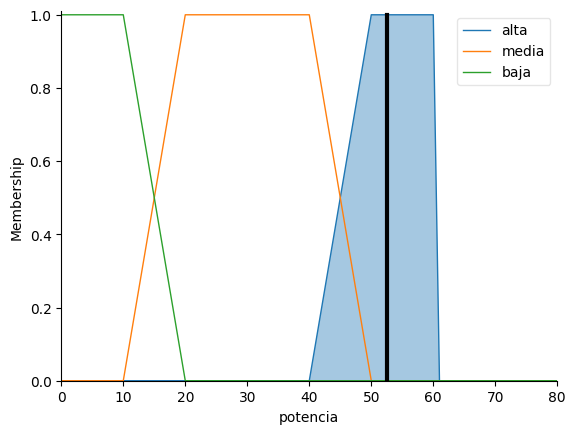

In [30]:
potencia.view(sim = potenciaMotor)

In [31]:
# Temperatura = 45
# Humedad = 25
potenciaMotor = ctrl.ControlSystemSimulation(controlPotencia)
potenciaMotor.input['temperatura'] = 45
potenciaMotor.input['humedad'] = 25
potenciaMotor.compute()

In [32]:
potenciaMotor.output['potencia']

23.771929824561404

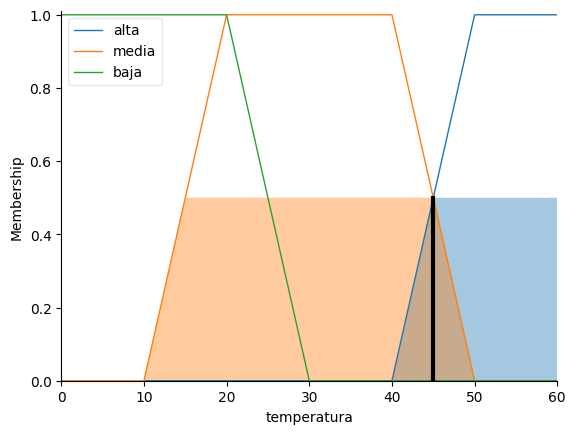

In [33]:
#Reglas activadas
temperatura.view(sim = potenciaMotor)

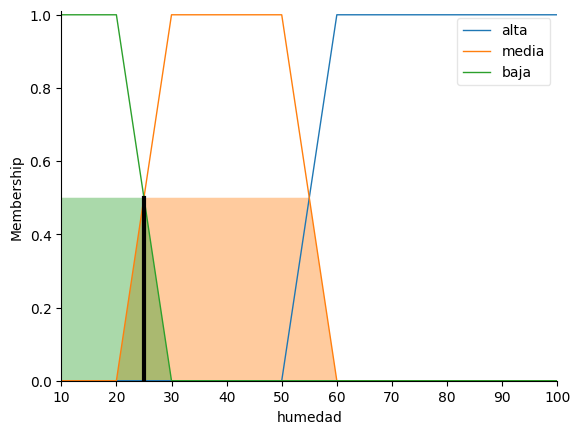

In [34]:
humedad.view(sim = potenciaMotor)